In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 勾配爆発実験

In [5]:
minibatch_size = 2
hidden_vector_size = 3
T = 20

dh = np.ones((minibatch_size, hidden_vector_size))
np.random.seed(3)
Wh = np.random.randn(hidden_vector_size,hidden_vector_size)

norm_list = []
for t in range(T):
    dh = dh @ Wh.T
    norm = np.sqrt(np.sum(dh**2)) / minibatch_size
    norm_list.append(norm)
    
print(norm_list)

[2.4684068094579303, 3.3357049741610365, 4.783279375373182, 6.279587332087612, 8.080776465019053, 10.251163032292936, 12.936063506609896, 16.276861327786712, 20.45482961834598, 25.688972842084684, 32.25315718048336, 40.48895641683869, 50.8244073070191, 63.79612654485427, 80.07737014308985, 100.5129892205125, 126.16331847536823, 158.35920648258823, 198.7710796761195, 249.495615421267]


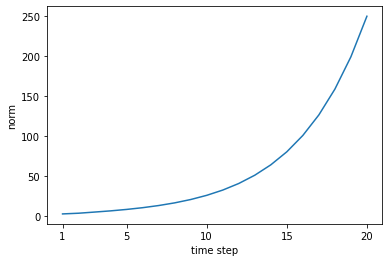

In [6]:
# グラフの描画
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('time step')
plt.ylabel('norm')
plt.show()

## 勾配消失実験

In [7]:
minibatch_size = 2
hidden_vector_size = 3
T = 20

dh = np.ones((minibatch_size, hidden_vector_size))
np.random.seed(3)
Wh = np.random.randn(hidden_vector_size,hidden_vector_size) * 0.5

norm_list = []
for t in range(T):
    dh = dh @ Wh.T
    norm = np.sqrt(np.sum(dh**2)) / minibatch_size
    norm_list.append(norm)
    
print(norm_list)

[1.2342034047289652, 0.8339262435402591, 0.5979099219216477, 0.39247420825547574, 0.2525242645318454, 0.16017442237957713, 0.10106299614538981, 0.06358148956166684, 0.03995083909833199, 0.025086887541098325, 0.015748611904532892, 0.009884999125204758, 0.006204151282595105, 0.003893806551809953, 0.002443767399386287, 0.0015337065005571365, 0.0009625497320203265, 0.0006040924319556741, 0.00037912574706291106, 0.00023793756048323344]


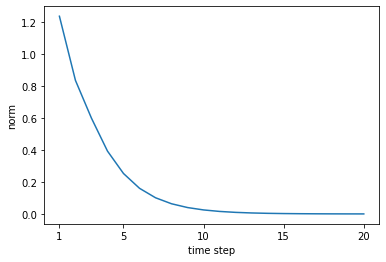

In [8]:
# グラフの描画
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('time step')
plt.ylabel('norm')
plt.show()

In [9]:

def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    rate = max_norm / (total_norm + 1e-6)
    if rate < 1:
        for grad in grads:
            grad *= rate

In [10]:
dW1 = np.random.rand(3,3) * 10
dW2 = np.random.rand(3,3) * 10
grads = [dW1, dW2]
max_norm = 5.0

clip_grads(grads, max_norm)

## LSTMを使った言語モデル

In [1]:
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from data import ptb
from lstm.rnnlm import Rnnlm

| epoch 1 |  iter 1 / 2655 | time 0[s] | perplexity 10002.26
| epoch 1 |  iter 21 / 2655 | time 4[s] | perplexity 3253.69
| epoch 1 |  iter 41 / 2655 | time 9[s] | perplexity 1230.90
| epoch 1 |  iter 61 / 2655 | time 13[s] | perplexity 1069.30
| epoch 1 |  iter 81 / 2655 | time 18[s] | perplexity 874.09
| epoch 1 |  iter 101 / 2655 | time 23[s] | perplexity 761.46
| epoch 1 |  iter 121 / 2655 | time 27[s] | perplexity 706.86
| epoch 1 |  iter 141 / 2655 | time 31[s] | perplexity 594.13
| epoch 1 |  iter 161 / 2655 | time 36[s] | perplexity 597.29
| epoch 1 |  iter 181 / 2655 | time 40[s] | perplexity 579.36
| epoch 1 |  iter 201 / 2655 | time 44[s] | perplexity 491.02
| epoch 1 |  iter 221 / 2655 | time 49[s] | perplexity 461.94
| epoch 1 |  iter 241 / 2655 | time 53[s] | perplexity 429.23
| epoch 1 |  iter 261 / 2655 | time 57[s] | perplexity 466.94
| epoch 1 |  iter 281 / 2655 | time 62[s] | perplexity 450.01
| epoch 1 |  iter 301 / 2655 | time 66[s] | perplexity 417.24
| epoch 1 | 

| epoch 1 |  iter 2601 / 2655 | time 549[s] | perplexity 144.35
| epoch 1 |  iter 2621 / 2655 | time 553[s] | perplexity 149.83
| epoch 1 |  iter 2641 / 2655 | time 557[s] | perplexity 209.75
| epoch 2 |  iter 1 / 2655 | time 560[s] | perplexity 206.61
| epoch 2 |  iter 21 / 2655 | time 565[s] | perplexity 148.51
| epoch 2 |  iter 41 / 2655 | time 569[s] | perplexity 147.84
| epoch 2 |  iter 61 / 2655 | time 573[s] | perplexity 190.90
| epoch 2 |  iter 81 / 2655 | time 577[s] | perplexity 176.50
| epoch 2 |  iter 101 / 2655 | time 581[s] | perplexity 163.06
| epoch 2 |  iter 121 / 2655 | time 585[s] | perplexity 144.49
| epoch 2 |  iter 141 / 2655 | time 590[s] | perplexity 146.57
| epoch 2 |  iter 161 / 2655 | time 594[s] | perplexity 160.95
| epoch 2 |  iter 181 / 2655 | time 598[s] | perplexity 169.87
| epoch 2 |  iter 201 / 2655 | time 602[s] | perplexity 162.04
| epoch 2 |  iter 221 / 2655 | time 606[s] | perplexity 155.06
| epoch 2 |  iter 241 / 2655 | time 611[s] | perplexity 14

| epoch 2 |  iter 2521 / 2655 | time 1089[s] | perplexity 122.97
| epoch 2 |  iter 2541 / 2655 | time 1093[s] | perplexity 112.16
| epoch 2 |  iter 2561 / 2655 | time 1097[s] | perplexity 99.80
| epoch 2 |  iter 2581 / 2655 | time 1102[s] | perplexity 131.98
| epoch 2 |  iter 2601 / 2655 | time 1106[s] | perplexity 108.90
| epoch 2 |  iter 2621 / 2655 | time 1110[s] | perplexity 106.29
| epoch 2 |  iter 2641 / 2655 | time 1114[s] | perplexity 156.68
| epoch 3 |  iter 1 / 2655 | time 1117[s] | perplexity 168.96
| epoch 3 |  iter 21 / 2655 | time 1121[s] | perplexity 102.41
| epoch 3 |  iter 41 / 2655 | time 1126[s] | perplexity 103.91
| epoch 3 |  iter 61 / 2655 | time 1130[s] | perplexity 144.20
| epoch 3 |  iter 81 / 2655 | time 1134[s] | perplexity 132.98
| epoch 3 |  iter 101 / 2655 | time 1138[s] | perplexity 125.65
| epoch 3 |  iter 121 / 2655 | time 1142[s] | perplexity 108.47
| epoch 3 |  iter 141 / 2655 | time 1147[s] | perplexity 110.74
| epoch 3 |  iter 161 / 2655 | time 1151

| epoch 3 |  iter 2421 / 2655 | time 1626[s] | perplexity 74.44
| epoch 3 |  iter 2441 / 2655 | time 1630[s] | perplexity 85.84
| epoch 3 |  iter 2461 / 2655 | time 1635[s] | perplexity 107.04
| epoch 3 |  iter 2481 / 2655 | time 1639[s] | perplexity 113.32
| epoch 3 |  iter 2501 / 2655 | time 1643[s] | perplexity 111.95
| epoch 3 |  iter 2521 / 2655 | time 1647[s] | perplexity 105.92
| epoch 3 |  iter 2541 / 2655 | time 1651[s] | perplexity 98.05
| epoch 3 |  iter 2561 / 2655 | time 1656[s] | perplexity 84.12
| epoch 3 |  iter 2581 / 2655 | time 1660[s] | perplexity 116.65
| epoch 3 |  iter 2601 / 2655 | time 1664[s] | perplexity 94.21
| epoch 3 |  iter 2621 / 2655 | time 1668[s] | perplexity 88.93
| epoch 3 |  iter 2641 / 2655 | time 1673[s] | perplexity 132.53
| epoch 4 |  iter 1 / 2655 | time 1676[s] | perplexity 146.13
| epoch 4 |  iter 21 / 2655 | time 1680[s] | perplexity 93.13
| epoch 4 |  iter 41 / 2655 | time 1684[s] | perplexity 82.22
| epoch 4 |  iter 61 / 2655 | time 1688[

| epoch 4 |  iter 2321 / 2655 | time 2164[s] | perplexity 93.15
| epoch 4 |  iter 2341 / 2655 | time 2168[s] | perplexity 99.16
| epoch 4 |  iter 2361 / 2655 | time 2172[s] | perplexity 108.94
| epoch 4 |  iter 2381 / 2655 | time 2176[s] | perplexity 77.14
| epoch 4 |  iter 2401 / 2655 | time 2181[s] | perplexity 82.33
| epoch 4 |  iter 2421 / 2655 | time 2185[s] | perplexity 65.27
| epoch 4 |  iter 2441 / 2655 | time 2189[s] | perplexity 73.53
| epoch 4 |  iter 2461 / 2655 | time 2193[s] | perplexity 95.47
| epoch 4 |  iter 2481 / 2655 | time 2198[s] | perplexity 102.26
| epoch 4 |  iter 2501 / 2655 | time 2202[s] | perplexity 96.60
| epoch 4 |  iter 2521 / 2655 | time 2206[s] | perplexity 95.23
| epoch 4 |  iter 2541 / 2655 | time 2210[s] | perplexity 90.46
| epoch 4 |  iter 2561 / 2655 | time 2215[s] | perplexity 75.52
| epoch 4 |  iter 2581 / 2655 | time 2219[s] | perplexity 104.51
| epoch 4 |  iter 2601 / 2655 | time 2223[s] | perplexity 84.48
| epoch 4 |  iter 2621 / 2655 | time 

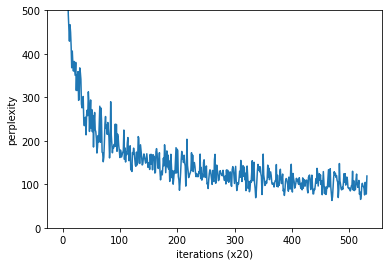

evaluating perplexity ...
234 / 235
test proplexity:  144.64403753616273


In [2]:
# ハイパーパラメータ
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNNの隠れ状態ベクトルの要素数
time_size = 35 # RNNを展開するサイズ
lr = 20.0
max_epoch = 4
max_grad = 0.25

# 学習データの読み込み
corpus, word_to_id, id_to_word = ptb.load_data("train")
corpus_test, _, _ = ptb.load_data("test")
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

# モデルの生成
model = Rnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

# 勾配クリッピングを適用して学習
trainer.fit(xs, ts, max_epoch, batch_size, time_size, max_grad, eval_interval=20)
trainer.plot(ylim=(0, 500))

# テストデータで評価
model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print("test proplexity: ", ppl_test)

# パラメータ保存
model.save_params()

## 改善版rnnlm

In [2]:
from common import config
from lstm.better_rnnlm import BetterRnnlm

In [5]:
# ハイパーパラメータ
batch_size = 20
wordvec_size = 650
hidden_size = 650 # RNNの隠れ状態ベクトルの要素数
time_size = 35 # RNNを展開するサイズ
lr = 20.0
max_epoch = 4
max_grad = 0.25
dropout = 0.5

# 学習データの読み込み
corpus, word_to_id, id_to_word = ptb.load_data("train")
corpus_val, _, _ = ptb.load_data("val")
corpus_test, _, _ = ptb.load_data("test")
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

model = BetterRnnlm(vocab_size, wordvec_size, hidden_size, dropout)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)
best_ppl = float('inf')
for epoch in range(max_epoch):
    trainer.fit(xs, ts, max_epoch=1, batch_size=batch_size,
                time_size=time_size, max_grad=max_grad)

    model.reset_state()
    ppl = eval_perplexity(model, corpus_val)
    print('valid perplexity: ', ppl)

    if best_ppl > ppl:
        best_ppl = ppl
        model.save_params()
    else:
        lr /= 4.0
        optimizer.lr = lr

    model.reset_state()
    print('-' * 50)


# テストデータでの評価
model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('test perplexity: ', ppl_test)

MemoryError: Unable to allocate 49.6 MiB for an array with shape (10000, 650) and data type float64